Kelompok Dokumen:
1. Annisa'U Rahma - 2602181603
2. Kristania Yohana Tumilaar - 2602182436
3. Kezia Angeline Santoso - 2602097542

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Mengimpor semua module dasar yang diperlukan

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/drive')
train = pd.read_csv("/drive/My Drive/titanic/train.csv")
test = pd.read_csv("/drive/My Drive/titanic/test.csv")
train.head()

Mounted at /drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Menghubungkan ke google drive untuk memuat dataset titanic: train, test

In [3]:
## statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Menghubungkan data train dan test untuk melakukan preprocessing pada semua data

In [4]:
## datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Mengisi value yang hilang dengan menggunakan value range: mean/rata-rata, minimum/nilai terkecil, maximum/nilai terbesar. Lalu mengubah value string ke integer.

<Axes: ylabel='count'>

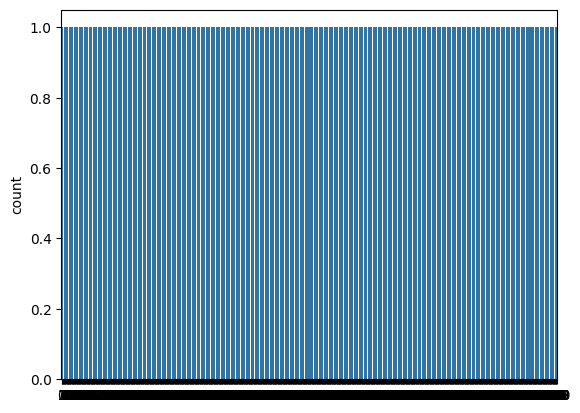

In [5]:
## categorical attributes
sns.countplot(train['Survived'])

Melakukan plotting untuk kategori Survived

<Axes: ylabel='count'>

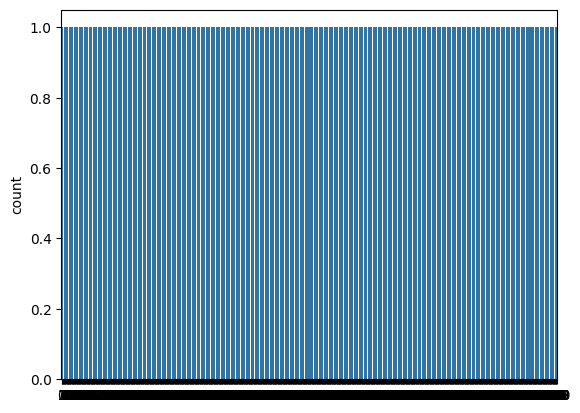

In [6]:
sns.countplot(train['Pclass'])

<Axes: xlabel='count', ylabel='Sex'>

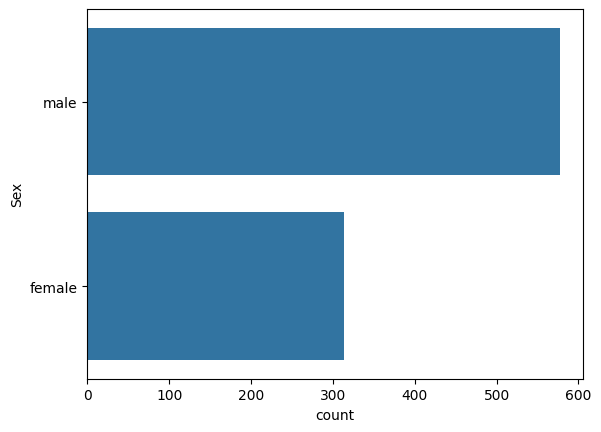

In [7]:
sns.countplot(train['Sex'])

Hasil plot untuk kategori Sex menunjukkan bahwa jumlah male lebih banyak daripada female.

<Axes: ylabel='count'>

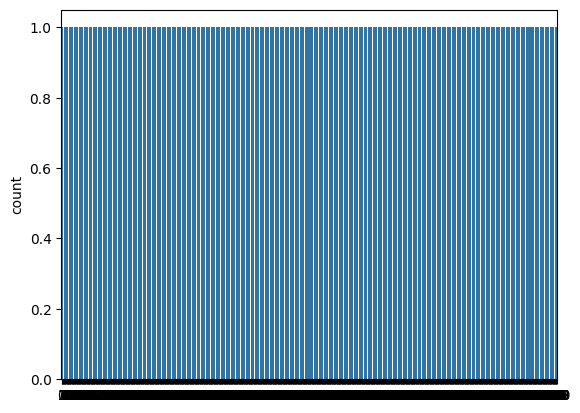

In [8]:
sns.countplot(train['SibSp'])

<Axes: ylabel='count'>

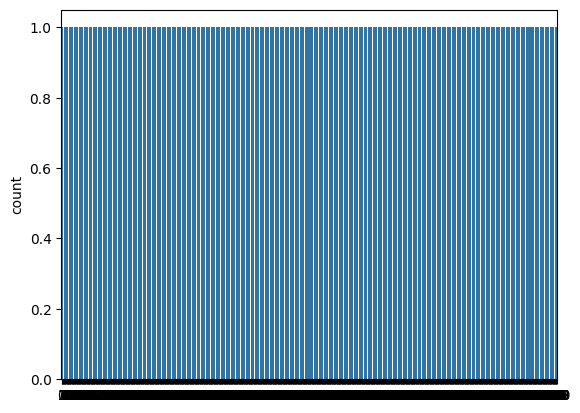

In [9]:
sns.countplot(train['Parch'])

<Axes: xlabel='count', ylabel='Embarked'>

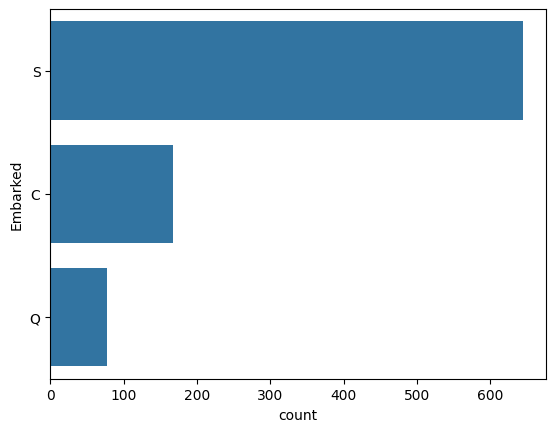

In [10]:
sns.countplot(train['Embarked'])

Plot Embarked menunjukkan pelabuhan atau kota boarding dari penumpang. Plot menunjukkan bahwa tempat S memiliki penumpang terbanyak

<Axes: xlabel='Age', ylabel='Density'>

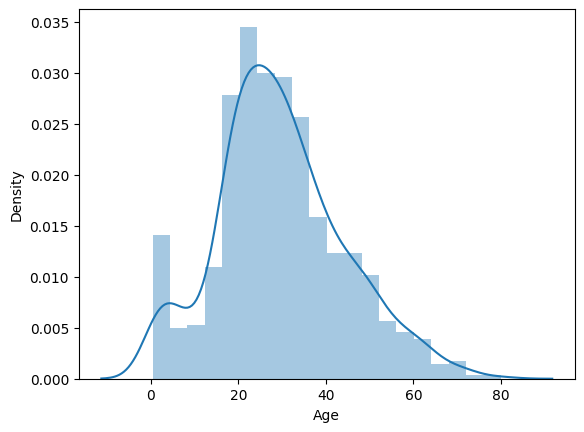

In [11]:
## numerical attributes
sns.distplot(train['Age'])

Grafik siatas menunjukkan bell curve distribusi normal

<Axes: xlabel='Fare', ylabel='Density'>

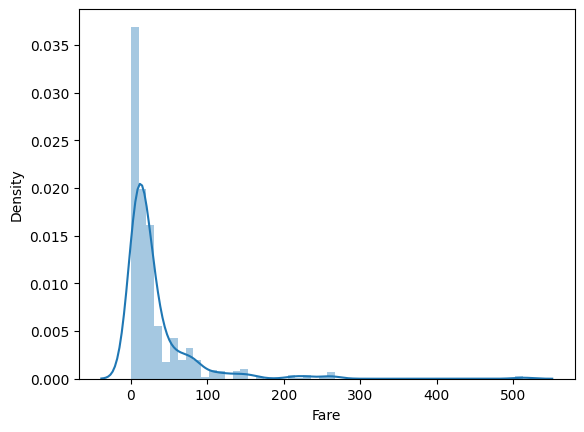

In [12]:
sns.distplot(train['Fare'])

Perlu preprocessing untuk mengubah garfik menjadi bell curve

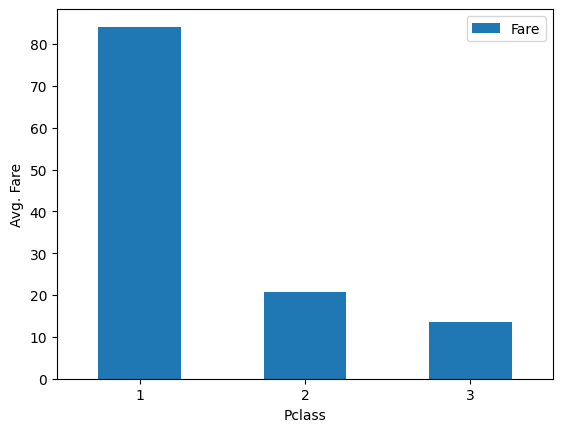

In [13]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

Membandingkan kelas tiket untuk membantu membuat asumsi terhadap harga dan kelas tiket

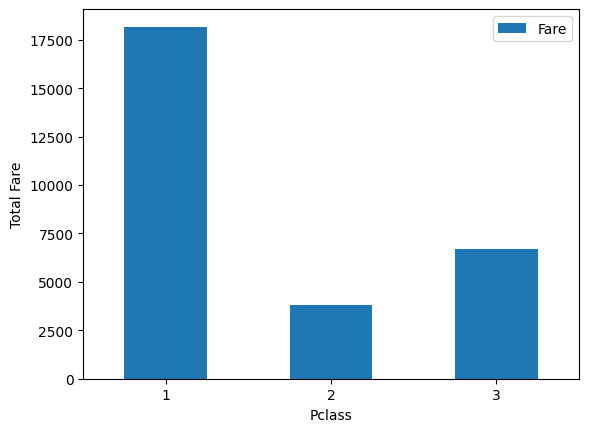

In [14]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

Visualisasi dapat membantu memahami  variasi dataset menurut atribut yang ada

<Axes: xlabel='Pclass', ylabel='Fare'>

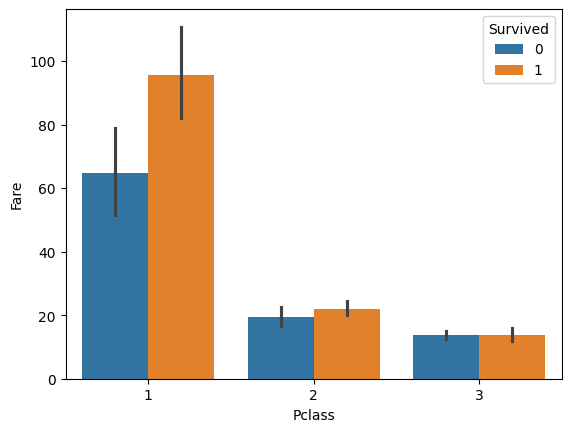

In [15]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

Plot diatas membandingkan penumpang yang selamat dengan kelas tiket penumpang

<Axes: xlabel='Survived', ylabel='Fare'>

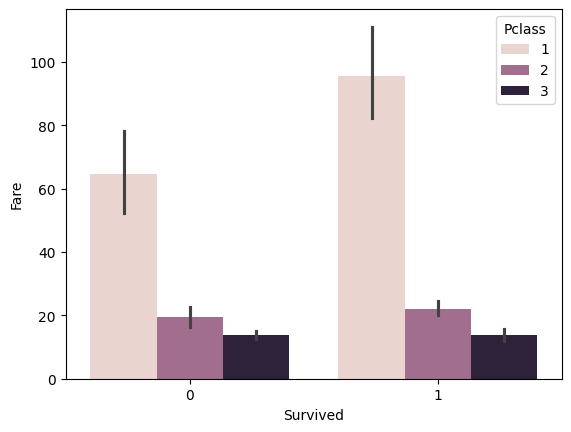

In [16]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

Plot menunjukkan perbandingan penumpang yang selamat dengan kelas tiket penumpang

In [17]:
train_len = len(train)
# combine two dataframes
df = pd.concat([train, test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Menghubungkan dataset train dan test, dan menunjukkan 5 baris pertama dari data frame

In [18]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Menunjukkan 5 baris terakhir dari data frame

In [19]:
## find the null values
df.isnull().sum()

,0
PassengerId,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Ticket,0
Fare,1


Mengecek dan menunjukkan jumlah vaue NULL di dataset

In [20]:
# drop or delete the column
df = df.drop(columns=['Cabin'], axis=1)

Menghapus kolom 'Cabin' dari dataset

In [22]:
df['Age'].mean()

29.881137667304014

Menunjukkan nilai rata-rata dari kolom 'Age'

In [21]:
# fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

Menggunakan nilai rata-rata untuk mengisi nilai NULL di kolom 'Age' dan 'Fare'

In [23]:
df['Embarked'].mode()[0]

'S'

Rata-rata nilai dari kolom 'Embarked'

In [24]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Menggunakan mode untuk mengisi value di baris yang kosong atau NULL

<Axes: xlabel='Fare', ylabel='Density'>

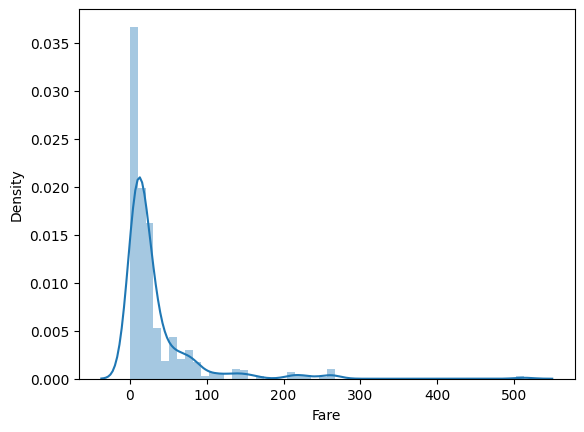

In [25]:
sns.distplot(df['Fare'])

Menunjukkan plot distribusi kolom 'Fare'

In [26]:
df['Fare'] = np.log(df['Fare']+1)

Melakukan normalisasi pada kolom 'Fare' dengan menambahkan +1 di log transformation, agar 'Fare' tidak memiliki nilai '0'

<Axes: xlabel='Fare', ylabel='Density'>

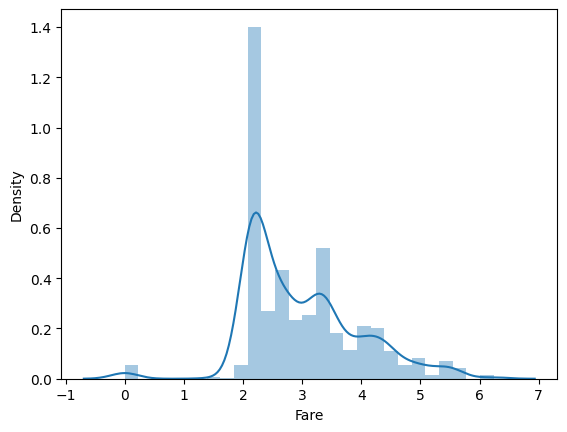

In [27]:
sns.distplot(df['Fare'])

Menunjukkan plot distribusi yang sudah dinormalisasi

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


Menunjukkan 5 baris teratas di data frame

In [29]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


Menghapus kolom yang tidak diperlukan, yaitu kolom 'Name' dan 'Ticket'

In [30]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


Melakukan label encoding, yaitu mengubah label ke bentuk numerik. Di kolom 'Sex', male diubah menjadi '1' dan female menjadi '0', dan di kolom 'Embarked', setiap kota diberi sebuah angka.

In [31]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

memisahkan dataset untuk data train dan test

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


Menunjukkan 5 baris teratas dari data frame train

In [33]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


Menunjukkan 5 baris teratas dari data frame test

In [34]:
# input split
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

Memisahkan input untuk training model

In [35]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


Menunjukkan 5 baris teratas dari data frame 'X'

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

Menyiapkan dataset untuk training dan testing, code diatas memastikan training dilakukan ke dataset 'Test' dan 'Train' secara bersamaan dan hasil training tetap akurat

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.7833971502102819


Training data dengan model logistic regression

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7354260089686099
CV Score: 0.765457284539577


Training data dengan model decision tree

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8071748878923767
CV Score: 0.808097420124286


Training data dengan model random forest

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.7892376681614349
CV Score: 0.7957567007720796


Training data dengan model extra tree

In [41]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.7847533632286996
CV Score: 0.8148327160881301


Training data dengan model XGBoost

In [42]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Training data dengan model LightGBM

In [43]:
!pip install catboost
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00
Accuracy: 0.8295964125560538
CV Score: 0.8226790534178645


Meng-import CatBoost

In [44]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.8295964125560538
CV Score: 0.8226790534178645


Training data dengan model CatBoost

In [45]:
model = LGBMClassifier()
model.fit(X, y)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

LightGBM merupakan model dengan CV Score tertinggi, maka lightBGM akan digunakan untuk training seluruh dataset

In [46]:
# input split for test data
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)

Memisahkan data untuk training

In [47]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


Menunjukkan 5 baris teratas dari data frame 'X_test'

In [48]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

data prediksi akan ada dalam bentuk array, makan kita memerlukan data frame untuk menyimpan data prediksi ini

In [49]:
sub = pd.read_csv('/drive/My Drive/titanic/gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Memasukkan data prediksi ke data frame template

In [50]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


Nilai prediksi ada di format float, maka nilai diubah menjadi integer sebelum dimasukkan ke data frame

In [51]:
sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype('int')

Mengubah format nilai prediksi dari float menjadi integer

In [52]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


Menunjukkan bahwa nilai prediksi memiliki format integer

In [53]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


Menunjukkan 5 baris teratas dari data frame 'sub'

In [54]:
sub.to_csv('submission.csv', index=False)

Memasukkan data tanpa kolom index, sehingga hanya ada kolom 'PassengerId' dan 'Survived'

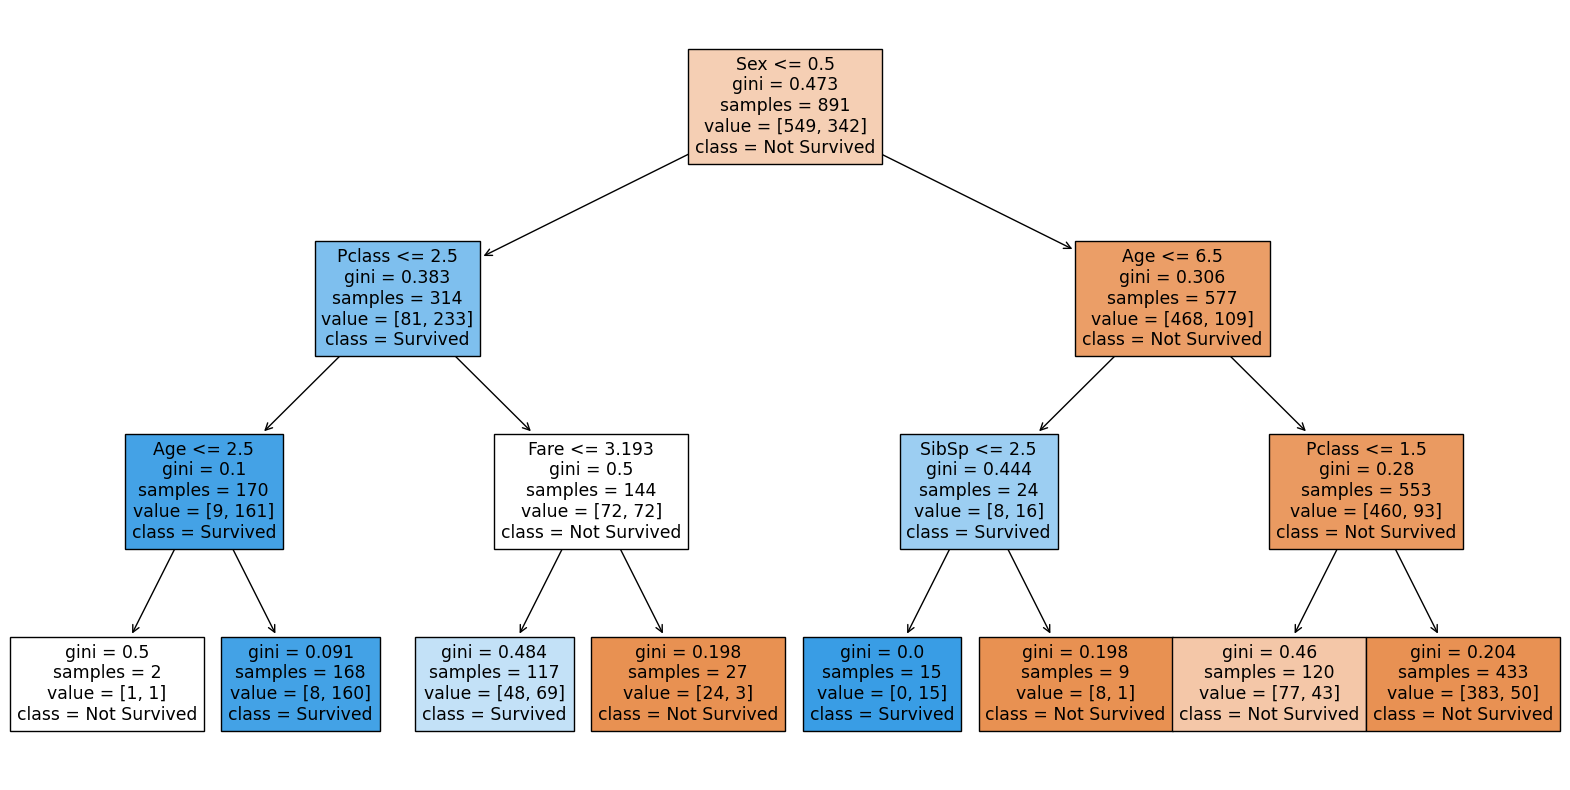

In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=3)  # You can adjust max_depth for visualization clarity
model.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

Menunjukkan plot decision tree yang dibuat dari hasil training dataset